In [1]:
# libraries for nicer notebook :)
from IPython import display
from IPython.core.display import HTML 

# LWCC - Example notebook

In this notebook you can find more advanced examples of how to use the LWCC library.

## 01 - Cover image

First example covers how to create images with density map overlay as seen in cover gif. Both images in the cover are taken from Pexels ([[1]](https://www.pexels.com/photo/people-walking-on-pedestrian-lane-during-daytime-109919/), [[2]](https://www.pexels.com/photo/bird-s-eye-view-of-group-of-people-1299086/)).

In [2]:
display.Image(url= "https://raw.githubusercontent.com/tersekmatija/lwcc/master/imgs/lwcc_header_gif.gif", width=500)

#### What is covered? 
This section will show the usage of **density maps**.
#### Additional requirements:
For this example you need to install *matplotlib*, *Pillow*, and *numpy*.


First, we load the needed libraries.

In [3]:
from lwcc import LWCC

# Pillow for image reading, numpy to handle array
from PIL import Image
import numpy as np

# matplotlib for plotting
%matplotlib inline
import matplotlib.pyplot as plt

# some imports to fix matplotlib imshow issue
import os    
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Now we read the image from the *dataset* folder and display it.

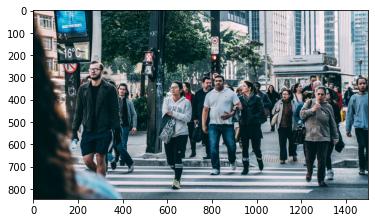

In [4]:
img_path = "dataset/img01.jpg"
img = Image.open(img_path).convert('RGB')
plt.imshow(img)
plt.show()

We predict the count and request the density map with *return_density* flag set to *True*. You can see we are using model **Bay** with **SHB** weights, as the crowd on the image is relatively sparse.

In [5]:
count, density = LWCC.get_count(img_path, model_name="Bay", model_weights="SHB", return_density=True)
print("Estimated number of people: {}".format(count))

C:/.lwcc/weights/Bay_SHB.pth
Built model Bay with weights SHB
Bay


C:\Users\matij\anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
C:\Users\matij\anaconda3\lib\site-packages\torch\nn\functional.py:3825: UserWarning: nn.functional.upsample_bilinear is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample_bilinear is deprecated. Use nn.functional.interpolate instead.")


Estimated number of people: 23.177549362182617


If you want, you can simply plot the density now using *imshow*.

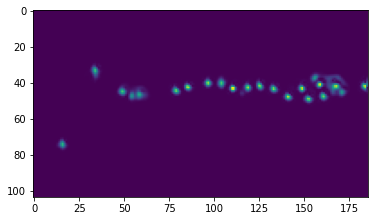

In [6]:
plt.imshow(density)
plt.show()

But we are trying to make the overlay as in the cover image. Since the predicted density is of smaller size, we have to upscale it to the size of the input image.

In [7]:
density = Image.fromarray(np.uint8(density * 255) , 'L') # turn it into Image
density = density.resize((img.size[0], img.size[1]), Image.BILINEAR)

Now, all we have to do is to combine the image and density and plot it.

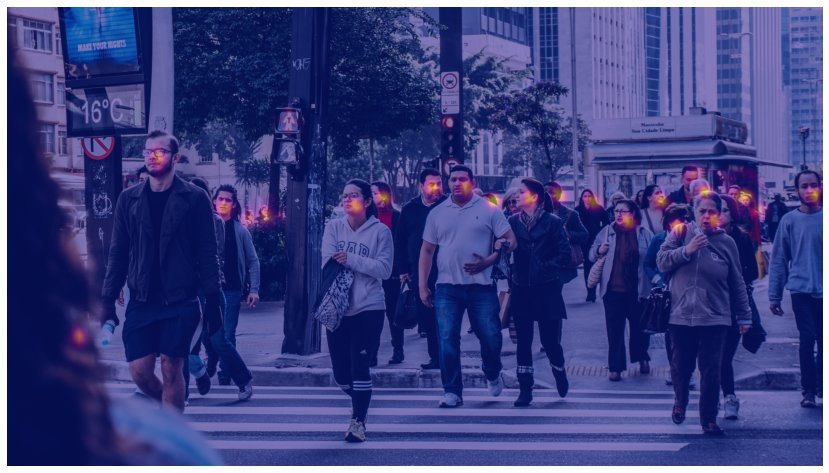

In [8]:
fig = plt.figure()

plt.imshow(img, origin='upper')
plt.imshow(density, alpha=.5,origin='upper', cmap= plt.get_cmap("plasma"))
plt.legend('',frameon=False)
plt.axis('off')

fig.set_size_inches(15, 8.44)
plt.show()

#fig.savefig('out.png', bbox_inches='tight', pad_inches=0)